In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

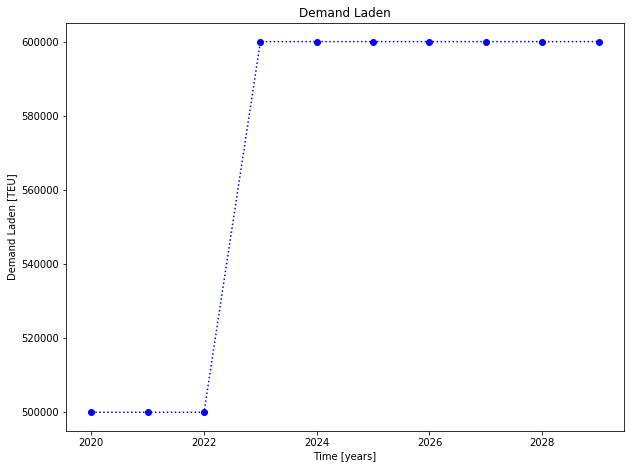

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2023:
        demand.append(500_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.laden_data['historic_data'] = []
laden = container_objects.Commodity(**container_defaults.laden_data)
laden.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [laden]


# plot scenarios 
if True:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 5840,   # example Wijnand
                         debug=True,
                         crane_type_defaults=container_defaults.mobile_crane_data, 
                         storage_type_defaults=container_defaults.silo_data)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [6]:
Terminal.simulate()


Simulate year: 2020
  Total vessel calls: 500
     Handysize calls: 0
     Handymax calls: 0
     Panamax calls: 500
  Total cargo volume: 500000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** ad

     Revenues (demand): 250000000
     Revenues (throughput): 0
     Revenues (demand): 250000000
     Revenues (throughput): 0
     Revenues (demand): 250000000
     Revenues (throughput): 250000000
     Revenues (demand): 300000000
     Revenues (throughput): 300000000
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
     Revenues (demand): 300000000
     Revenues (throughput): 299999999
PV: [-3.05185152e+07 -4.16318114e+07  2.45913235e+08  2.80386626e+08
  2.87012064e+08  2.96158631e+08  2.96617579e+08  2.97021694e+08
  2.97377528e+08  2.97690848e+08]
NPV: 2226027878.7968


## Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)


Laden

{'historic_data': [], 'scenario_data':    year  volume
0  2020  500000
1  2021  500000
2  2022  500000
3  2023  600000
4  2024  600000
5  2025  600000
6  2026  600000
7  2027  600000
8  2028  600000
9  2029  600000, 'handling_fee': 500, 'handysize_perc': 0, 'handymax_perc': 0, 'panamax_perc': 100, 'name': 'Laden', 'id': '5bf52df6-5f86-11e9-a843-7c76353a4af7'}

Handysize_1

{'type': 'Handysize', 'call_size': 35000, 'LOA': 130, 'draft': 10, 'beam': 24, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 600, 'name': 'Handysize_1', 'id': '5c131636-5f86-11e9-a745-7c76353a4af7'}

Handymax_1

{'type': 'Handymax', 'call_size': 55000, 'LOA': 180, 'draft': 11.5, 'beam': 28, 'max_cranes': 2, 'all_turn_time': 24, 'mooring_time': 3, 'demurrage_rate': 750, 'name': 'Handymax_1', 'id': '5c131637-5f86-11e9-a74d-7c76353a4af7'}

Panamax_1

{'type': 'Panamax', 'call_size': 1000, 'LOA': 290, 'draft': 13, 'beam': 32.2, 'max_cranes': 4, 'all_turn_time': 36, 'mooring_time': 3, 

{'triggers': [], 'renevue': [], 'labour': 75246.15384615384, 'maintenance': 48000.0, 'energy': [], 'insurance': 4800.0, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 510000, 'type': 'quay_conveyor', 'length': 200, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 10, 'unit_rate_factor': 6, 'mobilisation': 30000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'consumption_constant': 81, 'consumption_coefficient': 0.08, 'crew': 1, 'utilisation': 0.8, 'capacity_steps': 400, 'year_purchase': [], 'year_online': 2025, 'name': 'Quay_conveyor_01', 'id': '5c4808e6-5f86-11e9-8e6e-7c76353a4af7', 'shift': 4.492307692307692, 'df':    year     capex  maintenance  insurance        labour       energy
0  2020       0.0          0.0        0.0      0.000000     0.000000
1  2021       0.0          0.0        0.0      0.000000     0.000000
2  2022       0.0          0.0        0.0      0.000000     0.000000
3  2023       0.0          0.0        0.0      0.000000     0.000000
4 

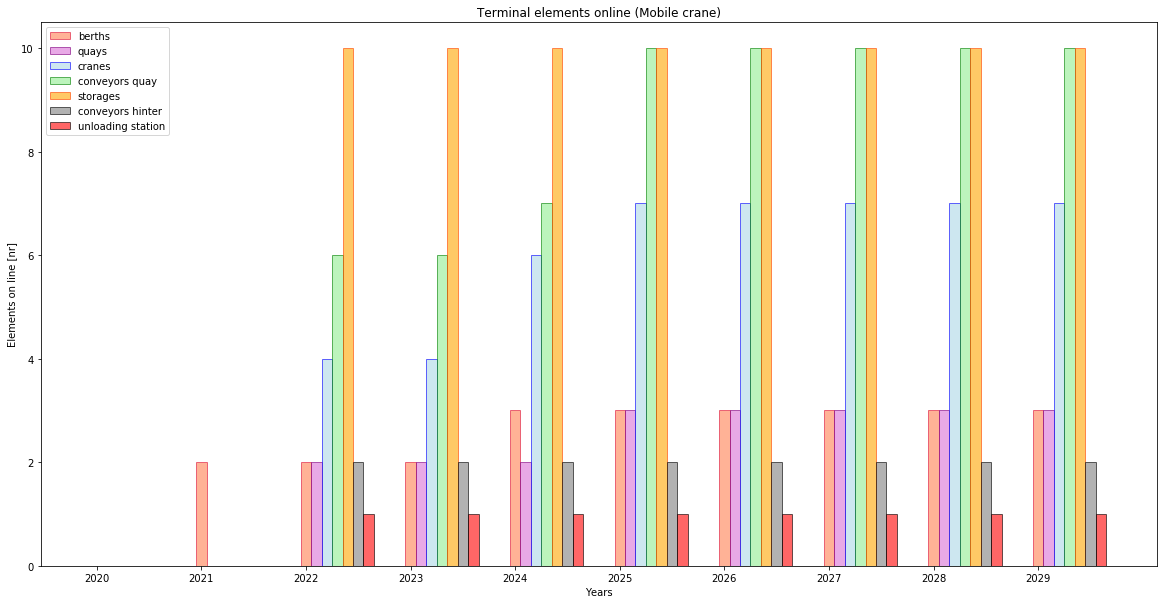

In [8]:
Terminal.terminal_elements_plot()

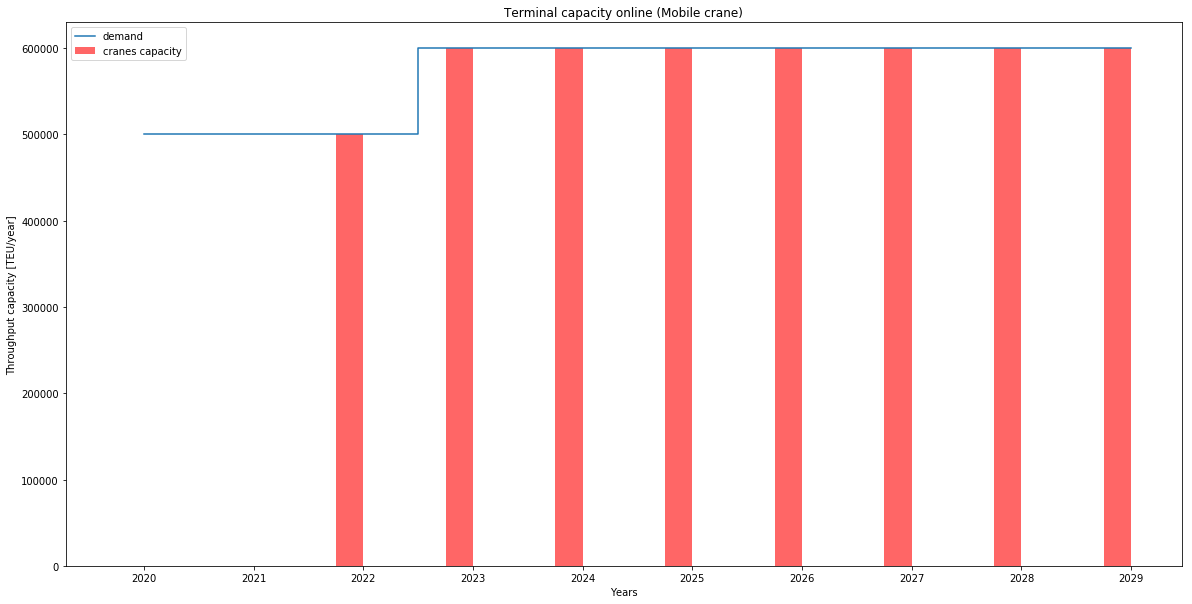

In [9]:
Terminal.terminal_capacity_plot()

In [10]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

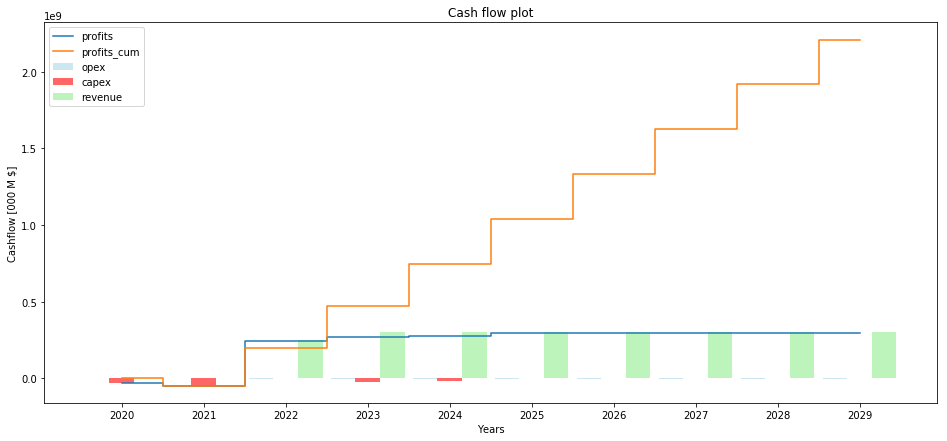

In [11]:
Terminal.cashflow_plot(cash_flows)

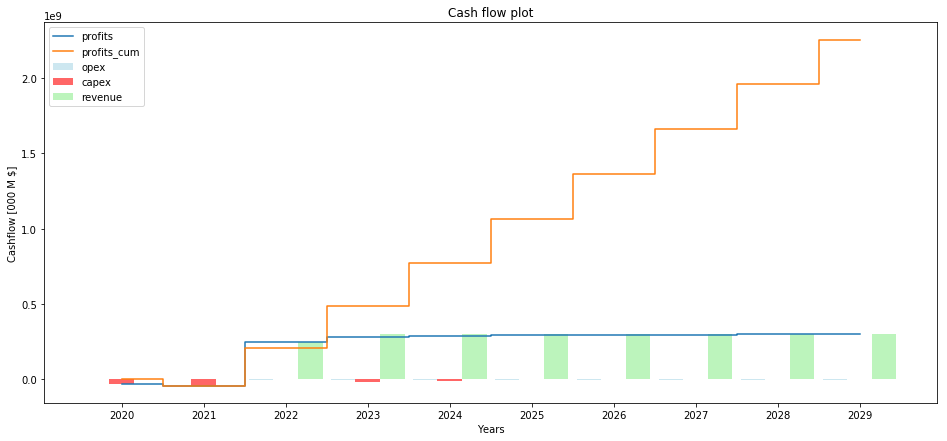

In [12]:
Terminal.cashflow_plot(cash_flows_WACC_real)

## SandBox

In [13]:
Terminal.NPV()

PV: [-3.05185152e+07 -4.16318114e+07  2.45913235e+08  2.80386626e+08
  2.87012064e+08  2.96158631e+08  2.96617579e+08  2.97021694e+08
  2.97377528e+08  2.97690848e+08]
NPV: 2226027878.7968
